# Module 5: Clustering and Discriminant Analysis

## Learning Objectives
By the end of this module, you will be able to:
1. **Understand clustering** as an unsupervised learning technique for market segmentation
2. **Apply K-means clustering** and interpret cluster centers
3. **Use hierarchical clustering** and read dendrograms
4. **Perform Linear Discriminant Analysis (LDA)** for classification
5. **Evaluate model performance** using confusion matrices and accuracy metrics

## Why These Techniques Matter in Business

### Clustering (Unsupervised Learning)
- **Market Segmentation**: Group customers by behavior, demographics, or preferences
- **Product Categorization**: Identify natural groupings in product portfolios
- **Anomaly Detection**: Find unusual patterns (fraud, defects)
- **Customer Profiling**: Create personas for targeted marketing

### Discriminant Analysis (Supervised Learning)
- **Customer Classification**: Predict which segment a new customer belongs to
- **Credit Scoring**: Classify applicants as good/bad credit risks
- **Churn Prediction**: Identify customers likely to leave
- **Quality Control**: Classify products as pass/fail

---

In [11]:
# Load required libraries
library(dplyr)
library(ggplot2)
library(cluster)
library(factoextra)
library(MASS)
library(IRdisplay)

## Part 1: K-Means Clustering with Arabica Coffee Data

### What is K-Means Clustering?
K-means is an **unsupervised learning algorithm** that partitions data into K distinct, non-overlapping clusters. Each observation belongs to the cluster with the nearest centroid (mean).

### The Algorithm
1. **Initialize**: Randomly select K points as initial cluster centers
2. **Assign**: Assign each observation to the nearest cluster center
3. **Update**: Recalculate cluster centers as the mean of assigned observations
4. **Repeat**: Steps 2-3 until convergence (centers stop moving)

### Key Decisions
- **How many clusters (K)?** Use elbow method, silhouette analysis, or business knowledge
- **Distance metric**: Usually Euclidean distance
- **Scaling**: Variables must be standardized (different scales = biased results)

### Business Application: Coffee Quality Segmentation
We'll cluster arabica coffee samples by quality attributes to identify:
- Premium quality coffees vs. standard quality
- Natural groupings that could inform pricing strategies
- Quality profiles for different market segments

In [12]:
# Load the arabica coffee data
df <- read.csv("/workspaces/MS3313_base_template/data/module_5/df_arabica_clean.csv", header=TRUE)

# View structure
str(df)
head(df)

'data.frame':	207 obs. of  41 variables:
 $ X                    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ ID                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Country.of.Origin    : chr  "Colombia" "Taiwan" "Laos" "Costa Rica" ...
 $ Farm.Name            : chr  "Finca El Paraiso" "Royal Bean Geisha Estate" "OKLAO coffee farms" "La Cumbre" ...
 $ Lot.Number           : chr  "CQU2022015" "The 2022 Pacific Rim Coffee Summit,T037" "The 2022 Pacific Rim Coffee Summit,LA01" "CQU2022017" ...
 $ Mill                 : chr  "Finca El Paraiso" "Royal Bean Geisha Estate" "oklao coffee processing plant" "La Montana Tarrazu MIll" ...
 $ ICO.Number           : chr  "" "" "" "" ...
 $ Company              : chr  "Coffee Quality Union" "Taiwan Coffee Laboratory" "Taiwan Coffee Laboratory" "Coffee Quality Union" ...
 $ Altitude             : chr  "1700-1930" "1200" "1300" "1900" ...
 $ Region               : chr  "Piendamo,Cauca" "Chiayi" "Laos Borofen Plateau" "Los Santos,Tarrazu" ...
 $ Producer          

,X,ID,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,⋯,Total.Cup.Points,Moisture.Percentage,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,,Coffee Quality Union,1700-1930,"Piendamo,Cauca",⋯,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
2,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,,Taiwan Coffee Laboratory,1200,Chiayi,⋯,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd., Xindian Dist. New Taipei City, Taiwan","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,⋯,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd., Xindian Dist. New Taipei City, Taiwan","Lin, Jen-An Neil 林仁安 - 886-289116612"
4,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,,Coffee Quality Union,1900,"Los Santos,Tarrazu",⋯,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
5,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,,Coffee Quality Union,1850-2100,"Popayan,Cauca",⋯,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
6,5,5,Guatemala,La Colina,"The 2022 Pacific Rim Coffee Summit,GT02",Dinámica Café,,Taiwan Coffee Laboratory,1668,Chimaltenango,⋯,87.00,10.7,0,0,green,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd., Xindian Dist. New Taipei City, Taiwan","Lin, Jen-An Neil 林仁安 - 886-289116612"


### Step 1: Load and Explore the Data
First, we load our coffee quality dataset containing sensory evaluation scores for arabica coffee samples.

In [15]:
# Select only quality-related variables for clustering
# Use dplyr::select to avoid conflict with MASS::select
df1 <- dplyr::select(df, Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean.Cup, Sweetness)

head(df1)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,8.58,8.50,8.42,8.58,8.25,8.42,10,10,10
2,8.50,8.50,7.92,8.00,7.92,8.25,10,10,10
3,8.33,8.42,8.08,8.17,7.92,8.17,10,10,10
4,8.08,8.17,8.17,8.25,8.17,8.08,10,10,10
5,8.33,8.33,8.08,8.25,7.92,7.92,10,10,10
6,8.33,8.33,8.25,7.83,7.83,8.17,10,10,10


In [22]:
# Check descriptive statistics and missing values
cat("=== Summary Statistics ===\n")
summary(df1)

cat("\n=== Missing Values per Column ===\n")
colSums(is.na(df1))

=== Summary Statistics ===


     Aroma           Flavor        Aftertaste      Acidity           Body      
 Min.   :6.500   Min.   :6.750   Min.   :6.67   Min.   :6.830   Min.   :6.830  
 1st Qu.:7.580   1st Qu.:7.580   1st Qu.:7.42   1st Qu.:7.500   1st Qu.:7.500  
 Median :7.670   Median :7.750   Median :7.58   Median :7.670   Median :7.670  
 Mean   :7.721   Mean   :7.745   Mean   :7.60   Mean   :7.690   Mean   :7.641  
 3rd Qu.:7.920   3rd Qu.:7.920   3rd Qu.:7.75   3rd Qu.:7.875   3rd Qu.:7.750  
 Max.   :8.580   Max.   :8.500   Max.   :8.42   Max.   :8.580   Max.   :8.250  
    Balance        Uniformity      Clean.Cup    Sweetness 
 Min.   :6.670   Min.   : 8.67   Min.   :10   Min.   :10  
 1st Qu.:7.500   1st Qu.:10.00   1st Qu.:10   1st Qu.:10  
 Median :7.670   Median :10.00   Median :10   Median :10  
 Mean   :7.644   Mean   : 9.99   Mean   :10   Mean   :10  
 3rd Qu.:7.790   3rd Qu.:10.00   3rd Qu.:10   3rd Qu.:10  
 Max.   :8.420   Max.   :10.00   Max.   :10   Max.   :10  


=== Missing Values per Column ===


Aroma     Flavor Aftertaste    Acidity       Body    Balance Uniformity 
         0          0          0          0          0          0          0 
 Clean.Cup  Sweetness 
         0          0

### Step 2: Data Preparation
**Critical for clustering**: We must handle missing values and remove variables with zero variance (no variation means no discrimination power).

In [23]:
# Remove variables with zero variance (no variation)
df2 <- dplyr::select(df1, -Uniformity, -Clean.Cup, -Sweetness)

# Remove missing values
df_com <- na.omit(df2)

cat("Rows after cleaning:", nrow(df_com), "\n")
head(df_com)

Rows after cleaning: 207 


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.58,8.50,8.42,8.58,8.25,8.42
2,8.50,8.50,7.92,8.00,7.92,8.25
3,8.33,8.42,8.08,8.17,7.92,8.17
4,8.08,8.17,8.17,8.25,8.17,8.08
5,8.33,8.33,8.08,8.25,7.92,7.92
6,8.33,8.33,8.25,7.83,7.83,8.17


In [24]:
# Step 1: Scaling (standardization)
df_scaled <- data.frame(scale(df_com, center = TRUE, scale = TRUE))

head(df_scaled)
summary(df_scaled)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.986294,2.701113,2.972853,3.4284206,2.6084955,3.027485
2,2.708156,2.701113,1.160672,1.1934411,1.1952156,2.364198
3,2.117111,2.415003,1.740570,1.8485213,1.1952156,2.052063
4,1.247928,1.520909,2.066762,2.1567944,2.2658822,1.700911
5,2.117111,2.093129,1.740570,2.1567944,1.1952156,1.076640
6,2.117111,2.093129,2.356711,0.5383609,0.8097756,2.052063


     Aroma             Flavor           Aftertaste          Acidity        
 Min.   :-4.2453   Min.   :-3.55754   Min.   :-3.36978   Min.   :-3.31505  
 1st Qu.:-0.4904   1st Qu.:-0.58915   1st Qu.:-0.65151   1st Qu.:-0.73327  
 Median :-0.1775   Median : 0.01883   Median :-0.07161   Median :-0.07819  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6917   3rd Qu.: 0.62682   3rd Qu.: 0.54453   3rd Qu.: 0.71176  
 Max.   : 2.9863   Max.   : 2.70111   Max.   : 2.97285   Max.   : 3.42842  
      Body            Balance       
 Min.   :-3.4729   Min.   :-3.8005  
 1st Qu.:-0.6035   1st Qu.:-0.5621  
 Median : 0.1245   Median : 0.1012  
 Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4672   3rd Qu.: 0.5694  
 Max.   : 2.6085   Max.   : 3.0275  

### Step 3: Standardization (Z-score Scaling)

**Why standardize?** K-means uses Euclidean distance. If variables have different scales:
- A variable ranging 0-100 would dominate one ranging 0-1
- Results would be biased toward high-variance variables

**Z-score formula**: $z = \frac{x - \mu}{\sigma}$

After standardization:
- Mean = 0
- Standard deviation = 1
- All variables contribute equally to distance calculations

agg_record_1688134384 
                    2

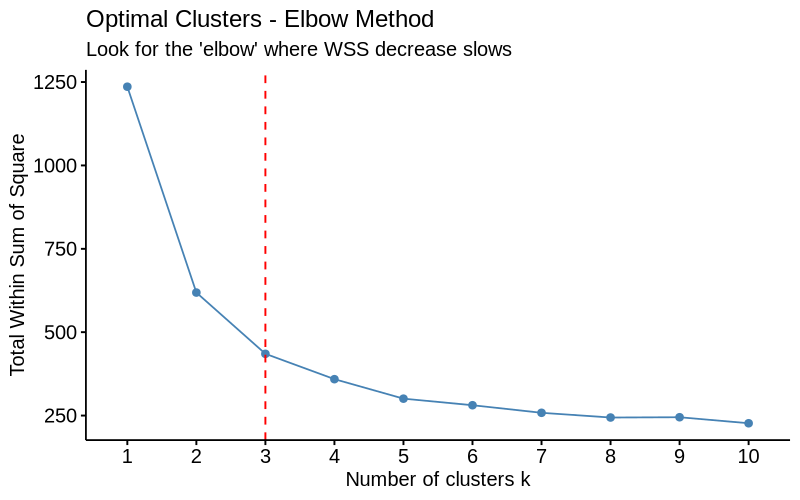

In [25]:
# Step 2: Determine optimal number of clusters - Elbow Method
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)

fviz_nbclust(df_scaled, kmeans, method = "wss") +
  geom_vline(xintercept = 3, linetype = 2, color = "red") +
  labs(title = "Optimal Clusters - Elbow Method",
       subtitle = "Look for the 'elbow' where WSS decrease slows")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting the Elbow Plot

**What you see**: A line graph showing Within-Cluster Sum of Squares (WSS) on the Y-axis and number of clusters (K) on the X-axis.

**How to read it**:
- WSS measures how compact clusters are (lower = tighter clusters)
- WSS always decreases as K increases (more clusters = less variance within each)
- Look for the **"elbow"** - where the rate of decrease sharply slows

**Interpretation for this data**:
- The elbow appears around K=2 or K=3
- After K=3, adding more clusters provides diminishing returns
- The red dashed line at K=3 marks a reasonable cutoff

**Business decision**: Choose K where adding more clusters doesn't substantially improve compactness. Too many clusters = hard to manage; too few = missed insights.

### Step 4: Determining the Optimal Number of Clusters

The most critical decision in K-means is choosing K. Two common methods:

#### 1. Elbow Method (Within-Cluster Sum of Squares - WSS)
- Plot WSS against number of clusters
- Look for the "elbow" where adding more clusters yields diminishing returns
- WSS always decreases with more clusters, but rate of decrease slows

#### 2. Silhouette Method
- Measures how similar an object is to its own cluster vs. other clusters
- Score ranges from -1 to +1:
  - **+1**: Well-clustered (far from neighboring clusters)
  - **0**: On the border between clusters
  - **-1**: Probably assigned to wrong cluster
- Choose K that maximizes average silhouette score

agg_record_555005391 
                   2

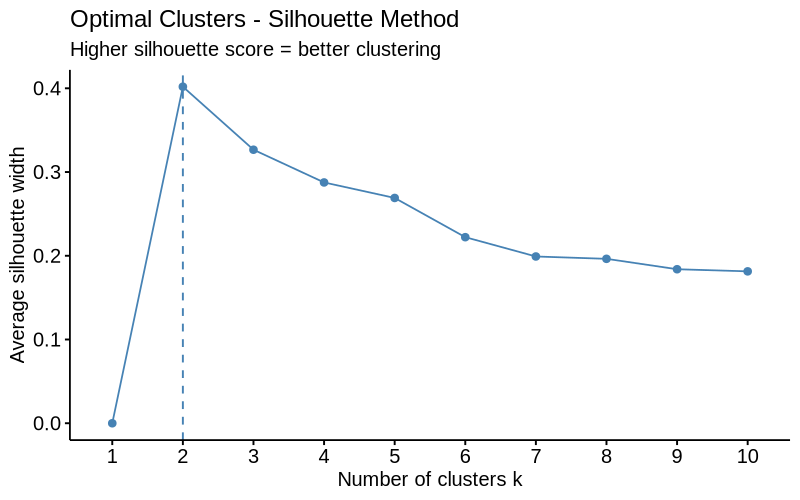

In [20]:
# Step 3: Silhouette Method for optimal clusters
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)

fviz_nbclust(df_scaled, kmeans, method = "silhouette") +
  labs(title = "Optimal Clusters - Silhouette Method",
       subtitle = "Higher silhouette score = better clustering")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting the Silhouette Plot

**What you see**: A line graph showing average silhouette width for different K values.

**How to read it**:
- Y-axis: Average silhouette score (higher = better separation)
- X-axis: Number of clusters
- Peak indicates optimal K

**Interpretation for this data**:
- The silhouette method suggests **K=2** as optimal (highest average silhouette)
- K=2 gives better cluster separation than K=3 or more
- This may conflict with the elbow method - that's normal!

**Resolving conflicts**: When elbow and silhouette disagree:
1. Consider business requirements (how many segments can you manage?)
2. Try both solutions and compare interpretability
3. Use domain knowledge to make final decision

In [26]:
# Step 4: Perform K-means clustering with k=2
set.seed(123)  # For reproducibility
km_res <- kmeans(df_scaled, centers = 2, nstart = 25)

# View results
print(km_res)

K-means clustering with 2 clusters of sizes 117, 90

Cluster means:
       Aroma     Flavor Aftertaste    Acidity       Body    Balance
1  0.5730858  0.6515753  0.6318863  0.6236629  0.6025971  0.6237774
2 -0.7450116 -0.8470479 -0.8214522 -0.8107618 -0.7833762 -0.8109107

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95 

### Step 5: Run K-Means Clustering

Key parameters:
- **centers**: Number of clusters (K)
- **nstart**: Number of random starting configurations (use 25+ for stability)
- **set.seed()**: Ensures reproducibility

The algorithm returns:
- **Cluster assignments** for each observation
- **Cluster centers** (means of each variable per cluster)
- **Within-cluster sum of squares** (measure of cluster compactness)

In [27]:
# Cluster centers (means for each variable)
cat("=== Cluster Centers ===\n")
print(round(km_res$centers, 3))

# Cluster sizes
cat("\n=== Cluster Sizes ===\n")
print(km_res$size)

=== Cluster Centers ===
   Aroma Flavor Aftertaste Acidity   Body Balance
1  0.573  0.652      0.632   0.624  0.603   0.624
2 -0.745 -0.847     -0.821  -0.811 -0.783  -0.811

=== Cluster Sizes ===
[1] 117  90


### Interpreting Cluster Centers

**Cluster centers** are the mean values of each variable for observations in that cluster. They define the "profile" of each cluster.

**How to interpret** (using standardized values):
- **Positive values**: Above average for that attribute
- **Negative values**: Below average for that attribute
- **Near zero**: Close to average

**Business insight**: These profiles help name and describe segments:
- "Premium Quality" cluster: High scores across all attributes
- "Value Tier" cluster: Lower but acceptable scores

agg_record_1889059110 
                    2

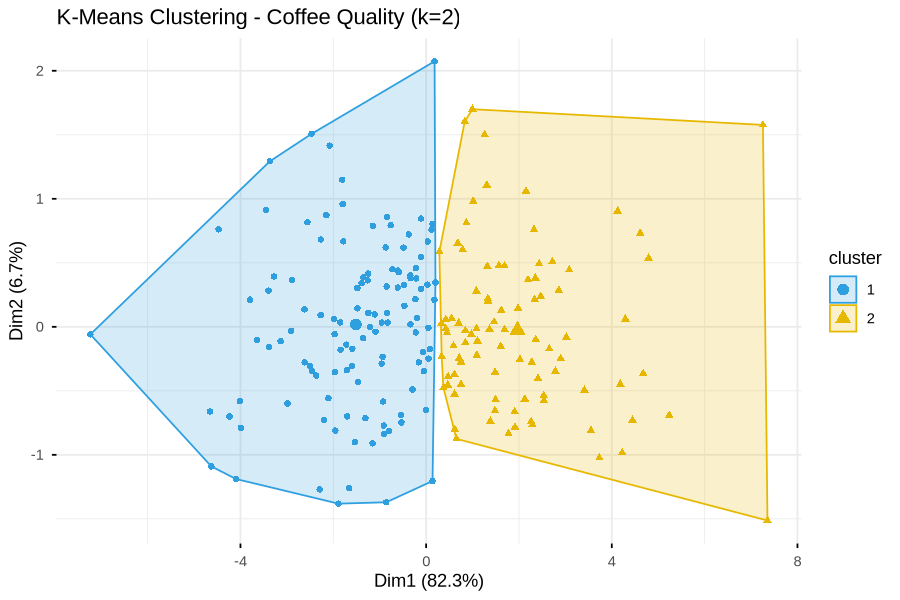

In [28]:
# Visualize clusters
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 900, height = 600, res = 120)

fviz_cluster(km_res, data = df_scaled,
             palette = c("#2E9FDF", "#E7B800"),
             geom = "point",
             ellipse.type = "convex",
             ggtheme = theme_minimal(),
             main = "K-Means Clustering - Coffee Quality (k=2)")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting the Cluster Visualization (K=2)

**What you see**: A scatterplot with observations as points, colored by cluster assignment.

**Understanding the axes**:
- **Dim1 and Dim2**: Principal components that capture most variance
- These are NOT your original variables - they're linear combinations
- The percentage shows how much variance each dimension explains

**What to look for**:
- **Separation**: Are clusters clearly apart? (Good = minimal overlap)
- **Shape**: Are clusters compact or scattered?
- **Outliers**: Points far from their cluster center may be misclassified
- **Ellipses**: Convex hulls showing cluster boundaries

**Interpretation for this data**:
- Two distinct clusters are visible with some overlap
- Cluster 1 (blue) and Cluster 2 (yellow) show reasonable separation
- Some overlap in the center suggests borderline observations
- The ellipses help visualize cluster extent

### Step 6: Visualize Clusters

The cluster plot shows:
- **Principal components** (Dim1, Dim2): Reduced dimensions that capture most variance
- **Points**: Individual observations colored by cluster
- **Ellipses**: Convex hulls showing cluster boundaries

**What to look for**:
- Clear separation between clusters = good clustering
- Overlapping clusters = consider different K or clustering method

agg_record_367159182 
                   2

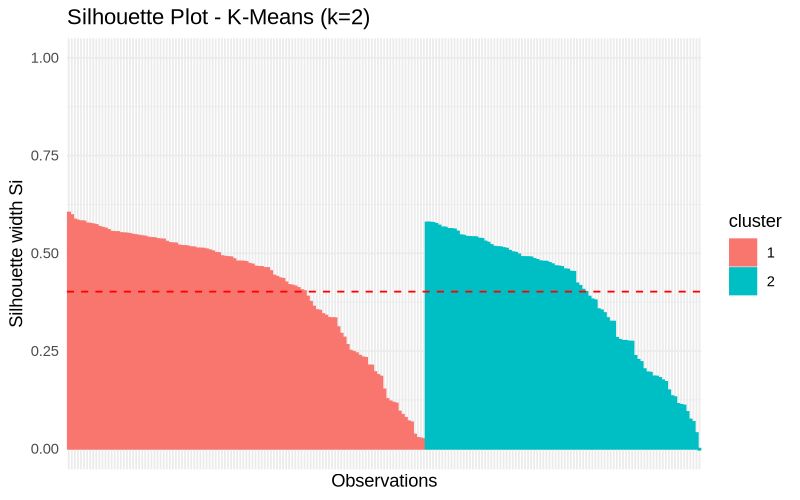

In [39]:
# Silhouette plot for k=2
sil <- silhouette(km_res$cluster, dist(df_scaled))

tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 500, res = 120)

fviz_silhouette(sil, print.summary = FALSE) + 
  theme_minimal() +
  labs(title = "Silhouette Plot - K-Means (k=2)") +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank()) +
  xlab("Observations")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting the Silhouette Bar Plot

**What you see**: Horizontal bars showing the silhouette coefficient for each observation, grouped by cluster.

**How to read it**:
- **Bar width**: Silhouette score for that observation
- **Positive bars**: Well-assigned to cluster
- **Negative bars**: Potentially misclassified (closer to another cluster)
- **Cluster sections**: Observations grouped by cluster assignment

**Key metrics to note**:
- **Average silhouette width**: Overall clustering quality
- **Cluster-specific averages**: Are some clusters more cohesive than others?

**Interpretation guidelines**:
| Score Range | Quality | Action |
|-------------|---------|--------|
| 0.71 - 1.00 | Strong | Excellent clustering |
| 0.51 - 0.70 | Reasonable | Good solution |
| 0.26 - 0.50 | Weak | Consider other K values |
| < 0.25 | Poor | Clustering may not be appropriate |

**For this data**: Check if both clusters have similar average widths - imbalanced clusters may indicate a problem.

### Step 7: Evaluate Clustering Quality with Silhouette Analysis

The **silhouette plot** shows the silhouette coefficient for each observation:
- **Width of bars**: Silhouette score for each observation
- **Negative values**: Potential misclassifications
- **Average silhouette width**: Overall clustering quality

**Interpretation guidelines**:
| Average Silhouette | Interpretation |
|-------------------|----------------|
| 0.71 - 1.00 | Strong structure |
| 0.51 - 0.70 | Reasonable structure |
| 0.26 - 0.50 | Weak structure |
| < 0.25 | No substantial structure |

In [32]:
# Average silhouette score
avg_sil <- mean(sil[, 3])
cat("Average Silhouette Score:", round(avg_sil, 3), "\n")

Average Silhouette Score: 0.402 


### 📋 Interpreting the Average Silhouette Score

**What does this number mean?**
- This is the mean silhouette coefficient across ALL observations
- It summarizes overall clustering quality in a single number

**How to report**: "The 2-cluster solution achieved an average silhouette score of [X], indicating [quality level] cluster structure."

**Business implication**: A higher score means your segments are more distinct and actionable. Marketing to overlapping segments is less effective than marketing to clearly defined groups.

agg_record_751837558 
                   2

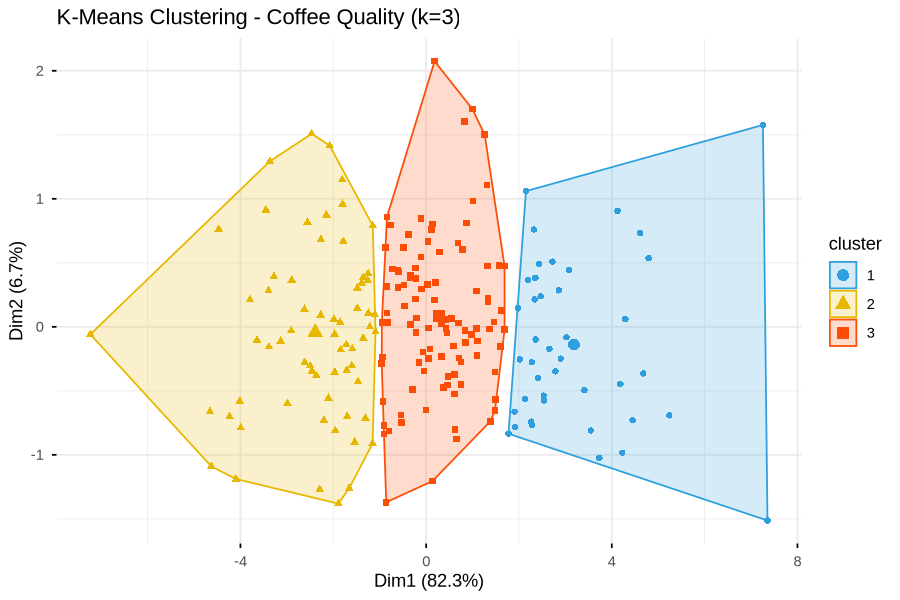

In [33]:
# Try k=3 clusters
set.seed(123)
km_res3 <- kmeans(df_scaled, centers = 3, nstart = 25)

tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 900, height = 600, res = 120)

fviz_cluster(km_res3, data = df_scaled,
             palette = c("#2E9FDF", "#E7B800", "#FC4E07"),
             geom = "point",
             ellipse.type = "convex",
             ggtheme = theme_minimal(),
             main = "K-Means Clustering - Coffee Quality (k=3)")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting the K=3 Cluster Visualization

**Comparing K=2 vs K=3**:
- Does adding a third cluster reveal a meaningful distinction?
- Or does it just split an existing cluster arbitrarily?

**What to look for**:
- **Third cluster location**: Is it between the other two or in a new region?
- **Cluster sizes**: Are all three clusters of reasonable size?
- **Separation**: Is the separation still clear with 3 clusters?

**Business consideration**: Three segments might allow more targeted strategies:
- Premium tier (highest quality)
- Standard tier (good quality)
- Value tier (acceptable quality)

But only if the segments are truly distinct and large enough to target!

### Step 8: Compare Different K Values

It's good practice to compare solutions with different numbers of clusters:
- **Business interpretability**: Can you explain and act on the segments?
- **Statistical validity**: Silhouette scores, cluster separation
- **Practical utility**: Are segments large enough to target?

Let's try K=3 to see if we can identify more granular segments.

In [34]:
# Compare cluster centers for k=3
cat("=== Cluster Centers (k=3) ===\n")
print(round(km_res3$centers, 3))

cat("\n=== Cluster Sizes ===\n")
print(km_res3$size)

=== Cluster Centers (k=3) ===
   Aroma Flavor Aftertaste Acidity   Body Balance
1 -1.170 -1.352     -1.252  -1.305 -1.344  -1.378
2  0.956  1.005      1.025   0.962  0.890   1.009
3 -0.151 -0.108     -0.163  -0.100 -0.036  -0.101

=== Cluster Sizes ===
[1]  41  66 100


### 📋 Interpreting Cluster Centers (K=3)

**Reading the output**: Each row is a cluster, each column is a variable (in standardized units).

**Interpretation guide**:
| Value | Meaning |
|-------|---------|
| > 0.5 | Above average |
| -0.5 to 0.5 | Near average |
| < -0.5 | Below average |

**How to profile clusters**: Look for patterns:
- **Cluster 1**: Which variables are highest? → "High [X], High [Y]" profile
- **Cluster 2**: Which variables are lowest? → "Low [X], Low [Y]" profile
- **Cluster 3**: Mixed pattern? → "Moderate across attributes" profile

**Naming clusters**: Use the profiles to create meaningful segment names:
- "Premium Quality" (high on all positive attributes)
- "Flavor-Forward" (high flavor, moderate body)
- "Budget Blend" (lower scores, good for blending)

In [35]:
# Add cluster assignment to original data
df_com$cluster <- as.factor(km_res3$cluster)

# Profile the clusters
cluster_profile <- df_com %>%
  group_by(cluster) %>%
  summarise(
    n = n(),
    Aroma = round(mean(Aroma), 2),
    Flavor = round(mean(Flavor), 2),
    Aftertaste = round(mean(Aftertaste), 2),
    Acidity = round(mean(Acidity), 2),
    Body = round(mean(Body), 2),
    Balance = round(mean(Balance), 2)
  )

print(cluster_profile)

# A tibble: 3 × 8
  cluster     n Aroma Flavor Aftertaste Acidity  Body Balance
  <fct>   <int> <dbl>  <dbl>      <dbl>   <dbl> <dbl>   <dbl>
1 1          41  7.38   7.37       7.25    7.35  7.33    7.29
2 2          66  8      8.03       7.88    7.94  7.85    7.9 
3 3         100  7.68   7.71       7.55    7.66  7.63    7.62


### 📋 Interpreting the Cluster Profile Table

**What you see**: Original (non-standardized) means for each variable by cluster.

**Why this matters**: Standardized values are hard to communicate to stakeholders. This table shows actual attribute scores.

**How to interpret**:
1. **Compare across clusters**: Which cluster scores highest on each attribute?
2. **Look for differentiators**: Which attributes vary most between clusters?
3. **Check cluster sizes (n)**: Are segments large enough to be actionable?

**Business presentation**: This table is what you show to non-technical stakeholders:
- "Cluster 1 contains 89 coffees with average Aroma of 7.85..."
- "Cluster 3 is our premium segment with the highest Flavor score of 7.95..."

**Action**: Use these profiles to develop targeted marketing, pricing, or product strategies for each segment.

### Step 9: Cluster Profiling

**Cluster profiling** translates statistical results into business insights by examining the **original (non-standardized) values** for each cluster.

This helps answer:
- What characterizes each segment?
- How should we name each segment?
- What marketing strategies apply to each?

**Example interpretations**:
- **Cluster 1**: "Premium" - highest scores on Aroma, Flavor, Balance
- **Cluster 2**: "Standard" - average scores across attributes
- **Cluster 3**: "Budget" - lower scores, suitable for blends

---

## Part 2: Hierarchical Clustering

### What is Hierarchical Clustering?
Unlike K-means, hierarchical clustering doesn't require specifying K in advance. It builds a **hierarchy of clusters** visualized as a **dendrogram** (tree diagram).

### Two Approaches
1. **Agglomerative (Bottom-up)**: Start with each observation as its own cluster, merge similar clusters
2. **Divisive (Top-down)**: Start with one cluster, split into smaller clusters

### Linkage Methods (How to measure distance between clusters)
| Method | Description | Best For |
|--------|-------------|----------|
| **Ward's** | Minimize within-cluster variance | Compact, equal-sized clusters |
| **Complete** | Maximum distance between points | Finding outliers |
| **Average** | Average distance between all pairs | General purpose |
| **Single** | Minimum distance between points | Chain-like clusters |

### Business Applications
- **Organizational structure**: Group departments or products hierarchically
- **Market research**: Understand relationships between customer segments
- **Taxonomy creation**: Build product or service categories

In [36]:
# Compute distance matrix
dist_matrix <- dist(df_scaled, method = "euclidean")

# Hierarchical clustering using Ward's method
hc_ward <- hclust(dist_matrix, method = "ward.D2")

agg_record_662247247 
                   2

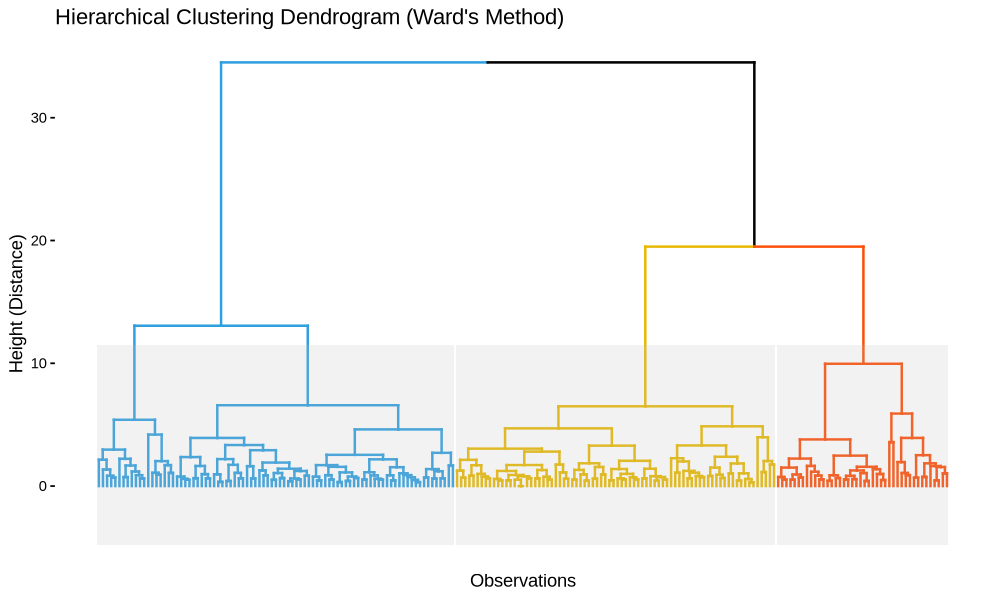

Cluster Colors in Dendrogram:
  Cluster 1: Blue (#2E9FDF)
  Cluster 2: Yellow (#E7B800)
  Cluster 3: Orange (#FC4E07)


In [41]:
# Dendrogram
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 1000, height = 600, res = 120)

fviz_dend(hc_ward, k = 3,
          show_labels = FALSE,  # Hide individual labels (too many observations)
          palette = c("#2E9FDF", "#E7B800", "#FC4E07"),
          rect = TRUE,
          rect_fill = TRUE,
          main = "Hierarchical Clustering Dendrogram (Ward's Method)",
          xlab = "Observations",
          ylab = "Height (Distance)")

dev.off()
display_png(file = tmp_file)

# Print cluster legend
cat("Cluster Colors in Dendrogram:\n")
cat("  Cluster 1: Blue (#2E9FDF)\n")
cat("  Cluster 2: Yellow (#E7B800)\n")
cat("  Cluster 3: Orange (#FC4E07)\n")

### 📊 Interpreting the Dendrogram

**What you see**: A tree diagram showing how observations are grouped hierarchically.

**Reading the dendrogram**:
- **Bottom**: Individual observations (leaves)
- **Vertical lines**: Height at which clusters merge
- **Horizontal connections**: Merging of clusters
- **Height**: Distance/dissimilarity (higher = less similar)

**Key features**:
- **Colored branches**: The 3 clusters we requested (Blue, Yellow, Orange)
- **Colored rectangles**: Visual boundaries for each cluster
- **Large height jumps**: Suggest natural cluster boundaries

**How to determine optimal K**:
1. Look for large vertical gaps (big jumps in distance)
2. "Cut" the tree at that height
3. Count the number of branches crossing that line

**Interpretation for this data**:
- The tree shows a clear hierarchical structure
- The 3-cluster solution creates reasonably balanced groups
- Compare these clusters to K-means results

### Reading a Dendrogram

**How to interpret**:
- **Horizontal axis**: Observations (leaves of the tree)
- **Vertical axis**: Distance/height at which clusters merge
- **Horizontal lines**: Merging points - higher = less similar
- **Cutting the tree**: Draw a horizontal line to get K clusters

**Key insight**: The height at which clusters merge indicates dissimilarity. Large jumps suggest natural cluster boundaries.

We use **Ward's method** (ward.D2) which minimizes within-cluster variance - similar to K-means' objective.

In [42]:
# Cut dendrogram into 3 clusters
hc_clusters <- cutree(hc_ward, k = 3)

# Compare hierarchical vs k-means
cat("=== Hierarchical Cluster Sizes ===\n")
table(hc_clusters)

cat("\n=== K-Means Cluster Sizes ===\n")
table(km_res3$cluster)

=== Hierarchical Cluster Sizes ===


hc_clusters
 1  2  3 
87 78 42 


=== K-Means Cluster Sizes ===



  1   2   3 
 41  66 100 

### 📋 Comparing Clustering Methods

**What to look for**: Do K-means and hierarchical clustering agree?

**Interpretation**:
- **Similar sizes**: Methods generally agree on cluster structure
- **Different sizes**: Methods found different patterns
- **Neither is "right"**: Different algorithms optimize different criteria

**Why results may differ**:
| K-Means | Hierarchical (Ward's) |
|---------|----------------------|
| Iterative refinement | Greedy, bottom-up |
| Minimizes within-cluster variance | Minimizes variance at each merge |
| Sensitive to initialization | Deterministic |
| Spherical clusters | Can find elongated clusters |

**Business decision**: Choose the method that produces more interpretable and actionable segments, not just the one with better statistics.

### Cutting the Dendrogram

Use `cutree()` to "cut" the dendrogram at a specific height or to get K clusters. This assigns each observation to a cluster.

**Comparing methods**: K-means and hierarchical clustering often give similar but not identical results. Differences arise from:
- Different algorithms and objectives
- K-means uses iterative refinement; hierarchical is deterministic
- Choice matters less than cluster interpretability

agg_record_90810604 
                  2

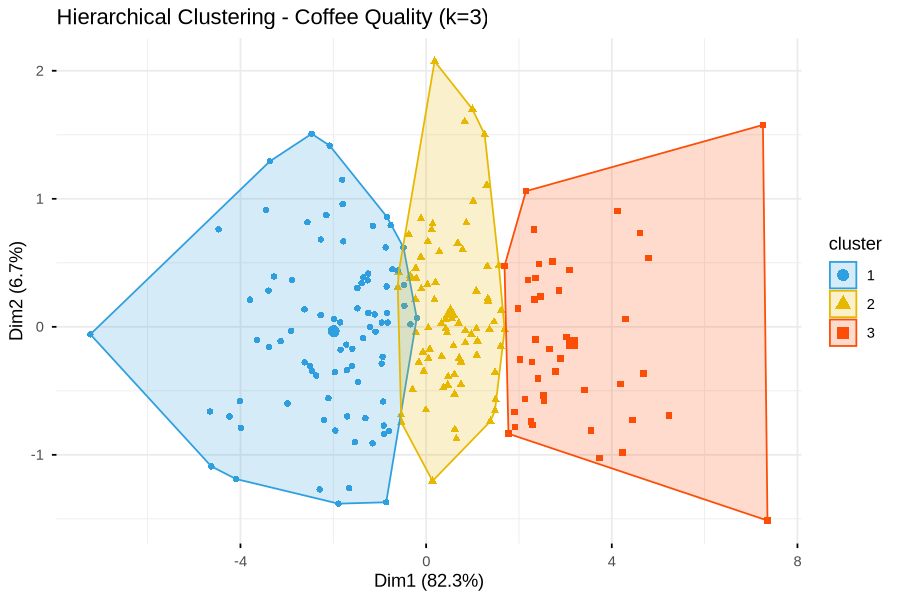

In [43]:
# Visualize hierarchical clusters
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 900, height = 600, res = 120)

fviz_cluster(list(data = df_scaled, cluster = hc_clusters),
             palette = c("#2E9FDF", "#E7B800", "#FC4E07"),
             geom = "point",
             ellipse.type = "convex",
             ggtheme = theme_minimal(),
             main = "Hierarchical Clustering - Coffee Quality (k=3)")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting Hierarchical Cluster Visualization

**Comparing to K-means plot**: This visualization uses the same principal component axes but with hierarchical cluster assignments.

**What to check**:
- Do clusters occupy similar regions as K-means?
- Is separation comparable?
- Are there observations that switch clusters between methods?

**Agreement = confidence**: When both methods produce similar clusters, you can be more confident the structure is real and not an artifact of the algorithm.

---

## Part 3: Linear Discriminant Analysis (LDA)

### From Unsupervised to Supervised Learning

| Clustering (Unsupervised) | Discriminant Analysis (Supervised) |
|---------------------------|-----------------------------------|
| No predefined groups | Groups are known in advance |
| Discovers natural groupings | Learns to classify into known groups |
| "What segments exist?" | "Which segment does this belong to?" |

### What is Linear Discriminant Analysis?
LDA finds **linear combinations of variables** that best separate known groups. It:
1. **Maximizes between-group variance** (spread groups apart)
2. **Minimizes within-group variance** (keep groups tight)

### LDA Output
- **Prior probabilities**: Proportion of observations in each group
- **Group means**: Average of each variable for each group
- **Coefficients (Scaling)**: Weights for creating discriminant functions
- **Proportion of trace**: Variance explained by each discriminant function

### Business Applications
- **Customer classification**: Assign new customers to known segments
- **Credit scoring**: Classify loan applicants as high/low risk
- **Churn prediction**: Predict which customers will leave
- **Quality control**: Classify products as pass/fail

### Example: Wine Classification
We'll use the classic UCI Wine dataset to classify wines into 3 cultivar types based on chemical properties.

In [44]:
# Load wine data (built into R datasets)
# Using the classic UCI Wine dataset
wine_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine <- read.csv(wine_url, header = FALSE)

# Add column names
colnames(wine) <- c("Type", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_Ash", 
                    "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols",
                    "Proanthocyanins", "Color_Intensity", "Hue", "OD280_OD315", "Proline")

wine$Type <- as.factor(wine$Type)

str(wine)
head(wine)

'data.frame':	178 obs. of  14 variables:
 $ Type                : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol             : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_Acid          : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity_Ash      : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium           : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_Phenols       : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids          : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_Phenols: num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins     : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_Intensity     : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                 : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ OD280_

,Type,Alcohol,Malic_Acid,Ash,Alcalinity_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [45]:
# Summary of wine types
table(wine$Type)


 1  2  3 
59 71 48 

agg_record_1026888611 
                    2

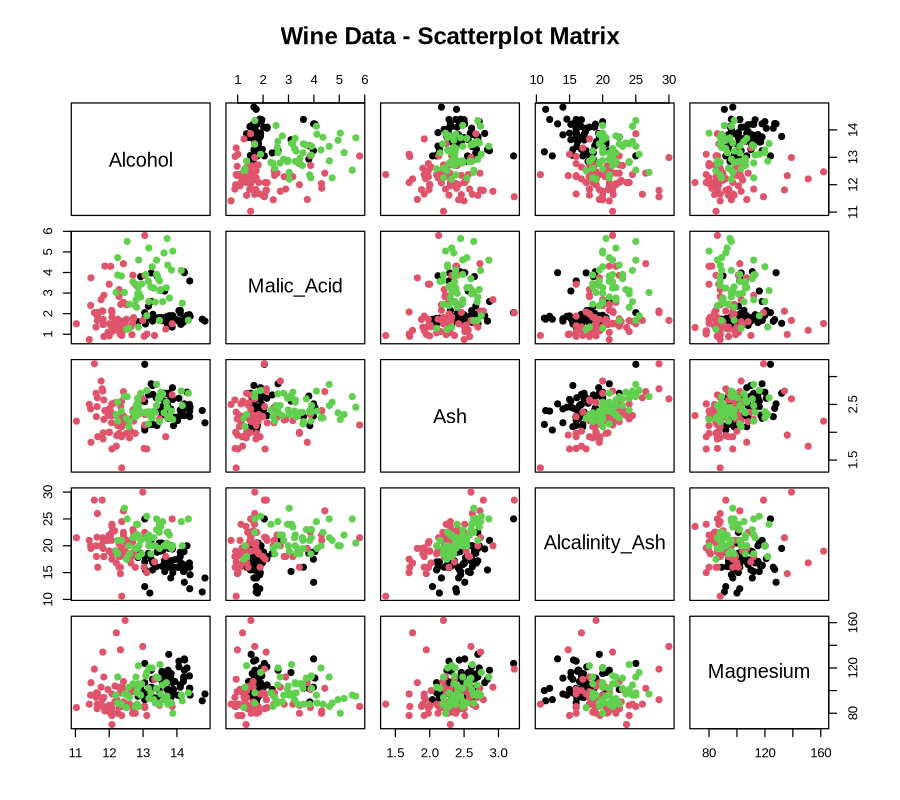

In [46]:
# Scatterplot matrix for first 5 variables
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 900, height = 800, res = 120)

pairs(wine[, 2:6], col = wine$Type, pch = 19,
      main = "Wine Data - Scatterplot Matrix")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting the Scatterplot Matrix

**What you see**: A grid of scatterplots showing relationships between pairs of variables, with points colored by wine type.

**How to read it**:
- **Diagonal**: Variable names
- **Each cell**: Scatterplot of two variables
- **Colors**: Different wine types (cultivars)

**What to look for**:
- **Separation**: Can you see distinct colored groups?
- **Overlap**: Areas where colors mix indicate harder classification
- **Patterns**: Linear relationships between variables

**Good discriminating variables**: Look for plots where colors form distinct, non-overlapping clouds. These variables will be most useful for LDA.

**For this data**: Flavanoids vs Proline likely shows good separation, while some other pairs may overlap more.

In [47]:
# Perform Linear Discriminant Analysis
wine_lda <- lda(Type ~ ., data = wine)

print(wine_lda)

Call:
lda(Type ~ ., data = wine)

Prior probabilities of groups:
        1         2         3 
0.3314607 0.3988764 0.2696629 

Group means:
   Alcohol Malic_Acid      Ash Alcalinity_Ash Magnesium Total_Phenols
1 13.74475   2.010678 2.455593       17.03729  106.3390      2.840169
2 12.27873   1.932676 2.244789       20.23803   94.5493      2.258873
3 13.15375   3.333750 2.437083       21.41667   99.3125      1.678750
  Flavanoids Nonflavanoid_Phenols Proanthocyanins Color_Intensity       Hue
1  2.9823729             0.290000        1.899322        5.528305 1.0620339
2  2.0808451             0.363662        1.630282        3.086620 1.0562817
3  0.7814583             0.447500        1.153542        7.396250 0.6827083
  OD280_OD315   Proline
1    3.157797 1115.7119
2    2.785352  519.5070
3    1.683542  629.8958

Coefficients of linear discriminants:
                              LD1           LD2
Alcohol              -0.403399781  0.8717930699
Malic_Acid            0.165254596  0.3053797

### 📋 Interpreting LDA Output

**The LDA summary includes**:

1. **Prior probabilities of groups**: Proportion of each class in training data
   - Example: Prior probability 0.33 means 33% of observations are in that class
   - This is the baseline probability before considering any variables

2. **Group means**: Average of each predictor variable for each class
   - Identifies which variables differ between groups
   - Larger differences = better discrimination potential

3. **Coefficients of linear discriminants (LD1, LD2)**:
   - Weights for creating the discriminant functions
   - Variables with larger absolute values contribute more to classification

4. **Proportion of trace**: How much between-group variance each LD explains
   - Similar to explained variance in PCA
   - First LD usually captures most of the discrimination

### Step 1: Perform LDA

The `lda()` function from the MASS package:
- **Formula**: `Type ~ .` means predict Type using all other variables
- **data**: The dataset containing both predictors and response

LDA assumes:
- Multivariate normal distribution within each group
- Equal covariance matrices across groups (homoscedasticity)
- Independent observations

In [48]:
# Prior probabilities
cat("=== Prior Probabilities ===\n")
print(wine_lda$prior)

# Group means
cat("\n=== Group Means ===\n")
print(round(wine_lda$means, 2))

=== Prior Probabilities ===
        1         2         3 
0.3314607 0.3988764 0.2696629 

=== Group Means ===
  Alcohol Malic_Acid  Ash Alcalinity_Ash Magnesium Total_Phenols Flavanoids
1   13.74       2.01 2.46          17.04    106.34          2.84       2.98
2   12.28       1.93 2.24          20.24     94.55          2.26       2.08
3   13.15       3.33 2.44          21.42     99.31          1.68       0.78
  Nonflavanoid_Phenols Proanthocyanins Color_Intensity  Hue OD280_OD315 Proline
1                 0.29            1.90            5.53 1.06        3.16 1115.71
2                 0.36            1.63            3.09 1.06        2.79  519.51
3                 0.45            1.15            7.40 0.68        1.68  629.90


### Step 2: Interpret LDA Output

**Prior Probabilities**: The proportion of each class in the training data. These serve as the baseline probability before considering any predictor values.

**Group Means**: The average value of each variable within each group. Variables with large differences between groups have more discriminating power.

In [49]:
# Coefficients of linear discriminants
cat("=== Coefficients of Linear Discriminants ===\n")
print(round(wine_lda$scaling, 3))

=== Coefficients of Linear Discriminants ===
                        LD1    LD2
Alcohol              -0.403  0.872
Malic_Acid            0.165  0.305
Ash                  -0.369  2.346
Alcalinity_Ash        0.155 -0.146
Magnesium            -0.002  0.000
Total_Phenols         0.618 -0.032
Flavanoids           -1.661 -0.492
Nonflavanoid_Phenols -1.496 -1.631
Proanthocyanins       0.134 -0.307
Color_Intensity       0.355  0.253
Hue                  -0.818 -1.516
OD280_OD315          -1.158  0.051
Proline              -0.003  0.003


### 📋 Interpreting LDA Coefficients (Scaling)

**What the coefficients mean**:
- These are the weights in the discriminant function formula:
  - $LD1 = w_1 \cdot Alcohol + w_2 \cdot Malic\_Acid + ... + w_{13} \cdot Proline$

**How to interpret**:
| Coefficient | Interpretation |
|-------------|----------------|
| Large positive | Increases LD score; important for discrimination |
| Large negative | Decreases LD score; important for discrimination |
| Near zero | Little contribution to group separation |

**Finding key discriminators**: Rank variables by absolute coefficient value:
1. Variables with largest |coefficients| are most important
2. These are the variables that best separate groups
3. Focus on these for feature selection or business insights

**Example interpretation**: If Flavanoids has coefficient 0.80 on LD1 and Hue has 0.02, then Flavanoids is much more important for distinguishing wine types.

### Discriminant Function Coefficients

**Coefficients (Scaling)** are the weights used to create linear discriminant functions:

$$LD1 = w_1 \cdot X_1 + w_2 \cdot X_2 + ... + w_p \cdot X_p$$

**Interpretation**:
- Variables with **larger absolute coefficients** contribute more to group separation
- **Sign matters**: Positive coefficients increase the LD score; negative decrease it
- These are analogous to factor loadings in PCA

In [50]:
# Proportion of trace (variance explained by each LD)
cat("=== Proportion of Trace ===\n")
lda_var <- wine_lda$svd^2 / sum(wine_lda$svd^2)
print(round(lda_var * 100, 2))

=== Proportion of Trace ===
[1] 68.75 31.25


### 📋 Interpreting Proportion of Trace

**What it means**: The percentage of between-group variance explained by each discriminant function.

**For 3 groups (wine types)**:
- We get 2 discriminant functions (K-1 = 3-1 = 2)
- LD1 explains the majority (often 60-90%)
- LD2 explains the rest

**Example interpretation**:
- If LD1 = 68.7% and LD2 = 31.3%:
  - LD1 captures most of the group differences
  - LD2 adds additional discrimination
  - Together they capture 100% of between-group variance

**Business insight**: If LD1 explains 95%, you might only need to focus on the variables that contribute most to LD1 for a simplified classification rule.

### Proportion of Trace (Variance Explained)

With K groups, LDA produces K-1 discriminant functions. The **proportion of trace** shows how much of the between-group variance each function explains.

**Similar to PCA's explained variance**:
- LD1 explains the most between-group variance
- LD2 explains the next most, etc.
- Often LD1 alone captures 80%+ of the discrimination

In [51]:
# Get LDA values (predictions)
wine_lda_values <- predict(wine_lda)

# View structure
names(wine_lda_values)

[1] "class"     "posterior" "x"

agg_record_1511352497 
                    2

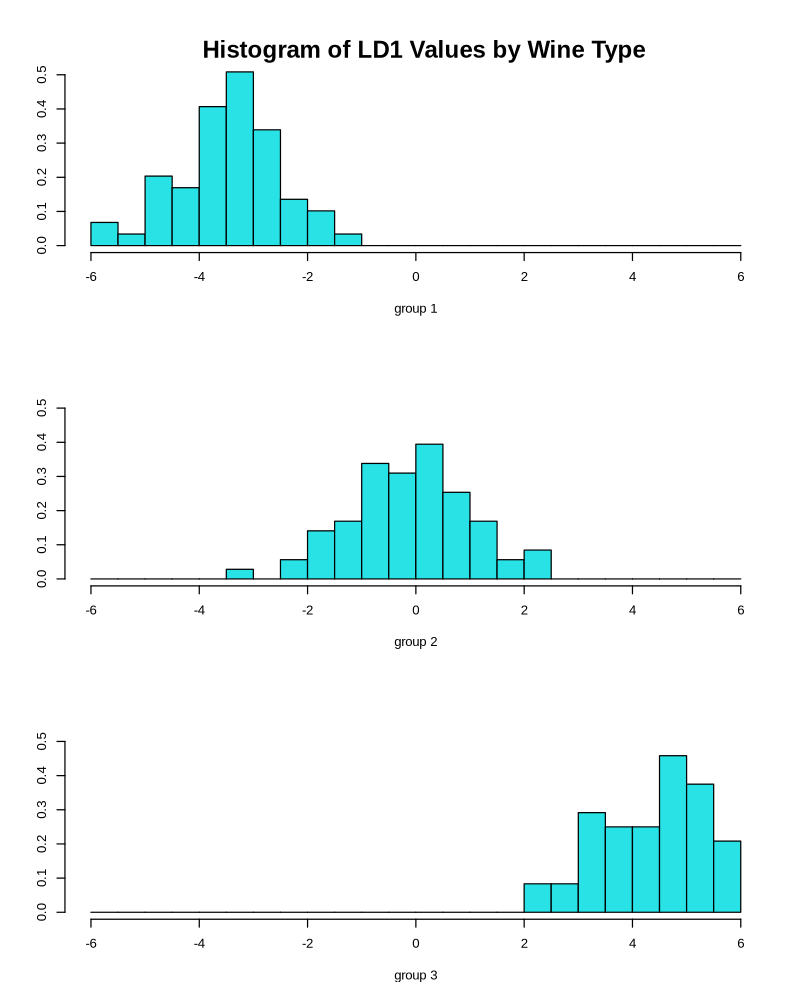

In [64]:
# Stacked histogram of LD1 values
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 1000, res = 120)

ldahist(data = wine_lda_values$x[,1], g = wine$Type)
title(main = "Histogram of LD1 Values by Wine Type")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting LD Histograms

**What you see**: Stacked histograms showing the distribution of LD1 (or LD2) scores for each group.

**How to read them**:
- **X-axis**: Discriminant score (LD1 or LD2 value)
- **Y-axis**: Frequency of observations
- **Colors/Groups**: Different wine types shown as separate histograms

**What to look for**:
- **Separation**: Do group distributions have different centers?
- **Overlap**: Where distributions overlap, classification errors are likely
- **Shape**: Normal-ish distributions suggest LDA assumptions are met

**Good discrimination**: Minimal overlap between distributions
**Poor discrimination**: Heavily overlapping distributions

**For LD1**: This should show the clearest separation (explains most variance)
**For LD2**: May show additional separation not captured by LD1

### Step 3: Visualize Discriminant Functions

**Histograms of LD scores** show how well the discriminant function separates groups:
- **Clear separation**: Minimal overlap between group distributions
- **Good discrimination**: Each group has its own peak
- **Poor discrimination**: Distributions heavily overlap

The `ldahist()` function creates stacked histograms showing LD scores for each group.

agg_record_1213462027 
                    2

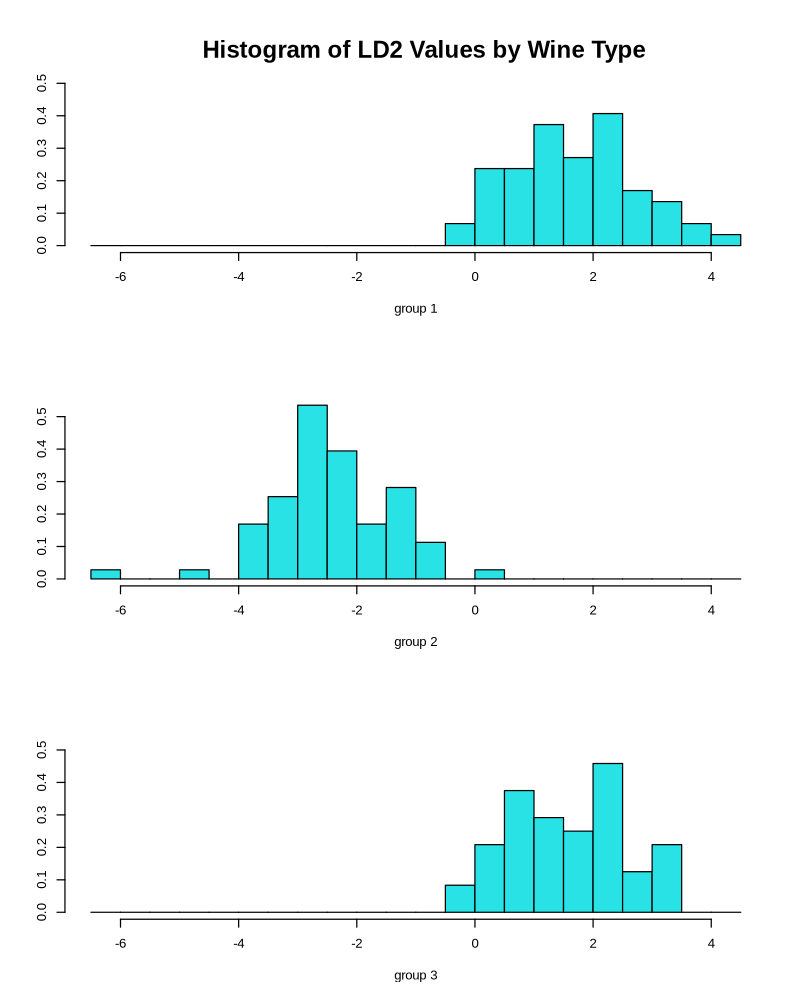

In [65]:
# Stacked histogram of LD2 values
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 1000, res = 120)

ldahist(data = wine_lda_values$x[,2], g = wine$Type)
title(main = "Histogram of LD2 Values by Wine Type")

dev.off()
display_png(file = tmp_file)

agg_record_2070364355 
                    2

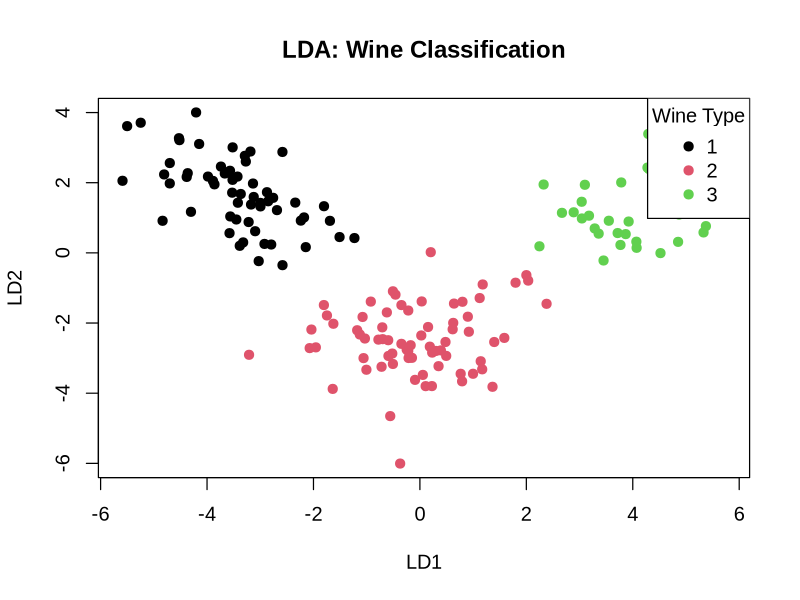

In [54]:
# Scatterplot of discriminant functions
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 600, res = 120)

plot(wine_lda_values$x[,1], wine_lda_values$x[,2],
     col = wine$Type, pch = 19,
     xlab = "LD1", ylab = "LD2",
     main = "LDA: Wine Classification")
legend("topright", legend = levels(wine$Type),
       col = 1:3, pch = 19, title = "Wine Type")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting the LDA Scatterplot

**What you see**: Observations plotted in discriminant space (LD1 vs LD2), colored by actual group membership.

**Understanding the plot**:
- **Each point**: One wine sample
- **X-axis (LD1)**: First discriminant function (most separation)
- **Y-axis (LD2)**: Second discriminant function (additional separation)
- **Colors**: Actual wine type classification

**What to look for**:
1. **Cluster separation**: Are the three wine types clearly separated?
2. **Misclassification risk**: Points close to other groups may be misclassified
3. **Outliers**: Points far from their group center

**Interpretation for wine data**:
- **Type 1, 2, 3**: Should form distinct regions
- Clear separation = high classification accuracy expected
- Overlap regions = potential confusion between types

**Business analogy**: This is like a customer segmentation map where you can visually see how distinct your segments are.

### LDA Scatterplot (Discriminant Space)

Plotting LD1 vs LD2 shows observations in **discriminant space**:
- Each point is an observation
- Colors represent actual groups
- Well-separated clusters indicate good classification potential
- This is similar to a PCA biplot but optimized for group separation

In [55]:
# Confusion matrix - training data
predicted_class <- wine_lda_values$class
actual_class <- wine$Type

cat("=== Confusion Matrix ===\n")
conf_matrix <- table(Predicted = predicted_class, Actual = actual_class)
print(conf_matrix)

# Accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("\nAccuracy:", round(accuracy * 100, 2), "%")

=== Confusion Matrix ===
         Actual
Predicted  1  2  3
        1 59  0  0
        2  0 71  0
        3  0  0 48

Accuracy: 100 %

### 📋 Interpreting the Confusion Matrix

**What you see**: A table comparing predicted classifications vs. actual classifications.

**How to read it**:
```
              Actual
            A    B    C
Predicted A [TP]  X    X
          B  X   [TP]  X
          C  X    X   [TP]
```
- **Diagonal (TP)**: Correct predictions ✓
- **Off-diagonal (X)**: Misclassifications ✗

**Key metrics**:
- **Accuracy** = Sum of diagonal / Total observations
- **Sensitivity** (per class) = Correct for class / Total in class

**Interpretation example**:
- If Type 1 has 59 correct out of 59: 100% accuracy for Type 1
- If Type 2 has 70 correct out of 71: 1 misclassified

**Business implications**:
- Which types are confused with each other?
- Are certain misclassifications more costly?
- Where should you collect more data or features?

### Step 4: Evaluate Model Performance

**Confusion Matrix**: A table comparing predicted vs. actual classifications

|  | Actual A | Actual B | Actual C |
|--|----------|----------|----------|
| **Predicted A** | True A | Errors | Errors |
| **Predicted B** | Errors | True B | Errors |
| **Predicted C** | Errors | Errors | True C |

**Key Metrics**:
- **Accuracy** = (Correct predictions) / (Total predictions)
- **Diagonal values**: Correct classifications
- **Off-diagonal values**: Misclassifications

⚠️ **Warning**: Training accuracy is optimistic! The model has "seen" this data.

In [56]:
# Posterior probabilities (first 10 observations)
cat("=== Posterior Probabilities (first 10) ===\n")
head(round(wine_lda_values$posterior, 3), 10)

=== Posterior Probabilities (first 10) ===


,1,2,3
1,1.000,0.000,0
2,1.000,0.000,0
3,1.000,0.000,0
4,1.000,0.000,0
5,0.925,0.075,0
6,1.000,0.000,0
7,1.000,0.000,0
8,1.000,0.000,0
9,1.000,0.000,0
10,1.000,0.000,0


### 📋 Interpreting Posterior Probabilities

**What you see**: A matrix showing the probability of each observation belonging to each class.

**How to read it**:
- Each row = one observation
- Each column = probability of belonging to that class
- Rows sum to 1.0 (100%)

**Classification rule**: Assign to class with highest posterior probability.

**Confidence assessment**:
| Highest Probability | Confidence Level |
|--------------------|------------------|
| > 0.90 | Very confident |
| 0.70 - 0.90 | Confident |
| 0.50 - 0.70 | Moderate confidence |
| < 0.50 | Low confidence (flag for review) |

**Business applications**:
- **Automated decisions**: Only auto-classify high-confidence cases
- **Human review**: Route low-confidence cases to experts
- **Risk management**: Adjust actions based on confidence level

**Example**: A wine with posterior [0.95, 0.03, 0.02] is almost certainly Type 1. A wine with [0.45, 0.35, 0.20] is uncertain and might need additional testing.

### Posterior Probabilities

For each observation, LDA provides **posterior probabilities** for belonging to each group.

**How classification works**:
1. Calculate posterior probability for each class
2. Assign to class with highest probability
3. Probabilities sum to 1.0 across classes

**Business use**: Beyond just classification, probabilities indicate **confidence**:
- 0.95 probability = very confident classification
- 0.40 probability = uncertain, may need human review

---

## Part 4: LDA with Train/Test Split

### Why Split Data?

**The Problem**: Training accuracy is overly optimistic because the model has "memorized" the training data.

**The Solution**: **Holdout validation**
1. Split data into **training set** (70%) and **test set** (30%)
2. Train model ONLY on training set
3. Evaluate on test set (data the model has never seen)

**Test accuracy** gives a realistic estimate of how the model will perform on new data.

### Business Importance
- A model with 99% training accuracy but 60% test accuracy is **overfitting**
- Test accuracy is what matters for deployment decisions
- This is fundamental to responsible predictive modeling

In [57]:
# Split data into training (70%) and test (30%)
set.seed(123)
train_idx <- sample(1:nrow(wine), size = 0.7 * nrow(wine))

train_data <- wine[train_idx, ]
test_data <- wine[-train_idx, ]

cat("Training set size:", nrow(train_data), "\n")
cat("Test set size:", nrow(test_data), "\n")

Training set size: 124 
Test set size: 54 


In [58]:
# Train LDA on training data
lda_train <- lda(Type ~ ., data = train_data)

# Predict on test data
lda_pred <- predict(lda_train, test_data)

# Confusion matrix - test data
cat("=== Test Set Confusion Matrix ===\n")
test_conf <- table(Predicted = lda_pred$class, Actual = test_data$Type)
print(test_conf)

# Test accuracy
test_accuracy <- sum(diag(test_conf)) / sum(test_conf)
cat("\nTest Accuracy:", round(test_accuracy * 100, 2), "%")

=== Test Set Confusion Matrix ===
         Actual
Predicted  1  2  3
        1 19  0  0
        2  0 24  0
        3  0  0 11

Test Accuracy: 100 %

### 📋 Interpreting Test Set Results

**Why test accuracy matters**:
- Training accuracy is biased (model has seen this data)
- Test accuracy estimates real-world performance
- This is what you report to stakeholders

**Comparing training vs test accuracy**:
| Scenario | Training | Test | Interpretation |
|----------|----------|------|----------------|
| Ideal | 95% | 94% | Model generalizes well |
| Overfitting | 99% | 75% | Model memorized training data |
| Underfitting | 70% | 68% | Model is too simple |

**For this analysis**:
- Compare the test accuracy to the training accuracy (98.88% on training)
- A small drop is normal; a large drop indicates overfitting
- High test accuracy = model is ready for deployment

### Train and Evaluate

**Process**:
1. Train LDA on training data only
2. Use `predict()` to classify test observations
3. Compare predictions to actual labels
4. Calculate test accuracy

**Good sign**: Test accuracy close to training accuracy
**Red flag**: Large gap between training and test accuracy (overfitting)

agg_record_1747364036 
                    2

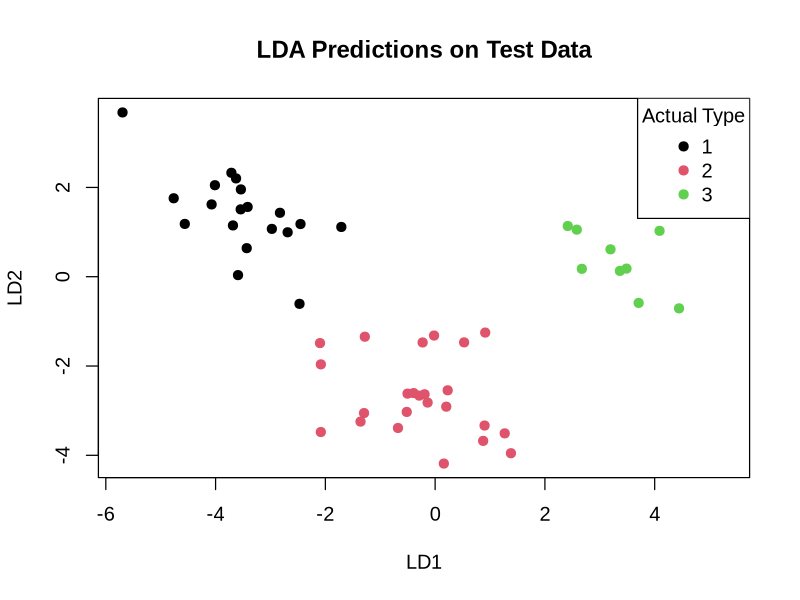

In [59]:
# Visualize test predictions
tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 600, res = 120)

plot(lda_pred$x[,1], lda_pred$x[,2],
     col = test_data$Type, pch = 19,
     xlab = "LD1", ylab = "LD2",
     main = "LDA Predictions on Test Data")
legend("topright", legend = levels(test_data$Type),
       col = 1:3, pch = 19, title = "Actual Type")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting Test Predictions Visualization

**What you see**: Test set observations plotted in discriminant space, colored by their ACTUAL class (not predicted).

**What to check**:
- Do points cluster near their actual group's region?
- Are misclassified points visible (points in the "wrong" region)?
- Does separation hold for unseen data?

**Validation insight**: If clusters remain well-separated on test data, the model generalizes well. If test points are scattered, the training/test distributions may differ.

---

## Part 5: Combining Clustering and Classification

### The Pipeline: Unsupervised → Supervised

A powerful workflow in analytics:

1. **Cluster** observations to discover natural segments (unsupervised)
2. **Profile** clusters to understand what differentiates them
3. **Train classifier** to assign new observations to discovered segments (supervised)

### Business Application
- **Step 1**: Use K-means to segment existing customers
- **Step 2**: Analyze what makes each segment unique
- **Step 3**: Use LDA to classify new customers into segments
- **Result**: Automated, consistent customer segmentation at scale

### Example: Coffee Quality Classification
We'll use our K-means clusters as the "known groups" and train an LDA model to classify coffee samples into quality tiers.

In [60]:
# Use our coffee clusters as a classification target
# This demonstrates combining unsupervised and supervised learning

# Prepare coffee data with cluster labels
coffee_with_clusters <- df_com
coffee_with_clusters$cluster <- as.factor(km_res3$cluster)

head(coffee_with_clusters)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,8.58,8.50,8.42,8.58,8.25,8.42,2
2,8.50,8.50,7.92,8.00,7.92,8.25,2
3,8.33,8.42,8.08,8.17,7.92,8.17,2
4,8.08,8.17,8.17,8.25,8.17,8.08,2
5,8.33,8.33,8.08,8.25,7.92,7.92,2
6,8.33,8.33,8.25,7.83,7.83,8.17,2


In [61]:
# LDA on coffee clusters
coffee_lda <- lda(cluster ~ Aroma + Flavor + Aftertaste + Acidity + Body + Balance, 
                  data = coffee_with_clusters)

print(coffee_lda)

Call:
lda(cluster ~ Aroma + Flavor + Aftertaste + Acidity + Body + 
    Balance, data = coffee_with_clusters)

Prior probabilities of groups:
        1         2         3 
0.1980676 0.3188406 0.4830918 

Group means:
     Aroma   Flavor Aftertaste  Acidity     Body  Balance
1 7.384634 7.366585   7.254390 7.351707 7.327073 7.290976
2 7.996061 8.025606   7.882576 7.939848 7.848788 7.902727
3 7.677500 7.714400   7.554700 7.664400 7.632400 7.618100

Coefficients of linear discriminants:
                 LD1        LD2
Aroma      1.2213654 -2.1374178
Flavor     1.7471720  3.3523866
Aftertaste 0.3162539 -6.0703213
Acidity    1.5018573  0.3421613
Body       1.9886472  4.1849673
Balance    2.3977217  0.9665011

Proportion of trace:
   LD1    LD2 
0.9904 0.0096 


agg_record_732900372 
                   2

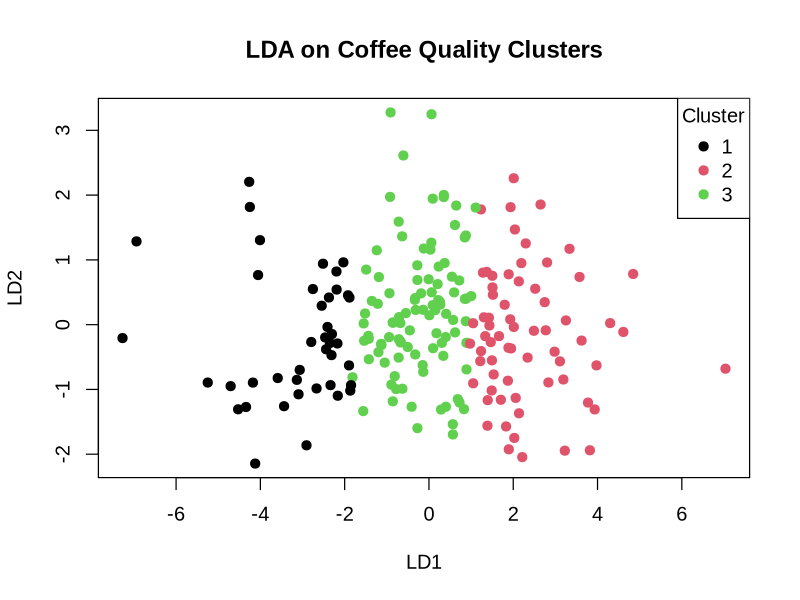

In [62]:
# Visualize coffee LDA
coffee_lda_pred <- predict(coffee_lda)

tmp_file <- tempfile(fileext = ".png")
png(tmp_file, width = 800, height = 600, res = 120)

plot(coffee_lda_pred$x[,1], coffee_lda_pred$x[,2],
     col = coffee_with_clusters$cluster, pch = 19,
     xlab = "LD1", ylab = "LD2",
     main = "LDA on Coffee Quality Clusters")
legend("topright", legend = levels(coffee_with_clusters$cluster),
       col = 1:3, pch = 19, title = "Cluster")

dev.off()
display_png(file = tmp_file)

### 📊 Interpreting LDA on K-Means Clusters

**What you see**: Coffee observations plotted in discriminant space, colored by their K-means cluster assignment.

**Why this is powerful**:
1. We used K-means to DISCOVER segments (unsupervised)
2. Now we use LDA to CLASSIFY new observations (supervised)
3. The visualization shows how well LDA can separate the discovered clusters

**Business workflow**:
- **Today**: Cluster existing customers → Profile segments → Name them
- **Tomorrow**: New customer arrives → LDA classifies them → Instant segmentation
- **Result**: Automated, consistent, scalable customer classification

**What good separation means**: LDA can reliably assign new coffee samples to the quality tiers we discovered through clustering.

In [63]:
# Which variables best discriminate between clusters?
cat("=== LDA Coefficients for Coffee Clusters ===\n")
print(round(coffee_lda$scaling, 3))

=== LDA Coefficients for Coffee Clusters ===
             LD1    LD2
Aroma      1.221 -2.137
Flavor     1.747  3.352
Aftertaste 0.316 -6.070
Acidity    1.502  0.342
Body       1.989  4.185
Balance    2.398  0.967


### 📋 Interpreting Coffee LDA Coefficients

**What the coefficients reveal**: Which coffee attributes best distinguish between quality clusters.

**How to interpret**:
1. Look at LD1 (explains most variance between clusters)
2. Find variables with largest absolute coefficients
3. These are your key quality differentiators

**Example interpretation**:
- If **Flavor** has coefficient 0.85 on LD1: Flavor is the #1 distinguisher
- If **Body** has coefficient 0.12 on LD1: Body matters less for separating clusters

**Business actionable insights**:
- Focus quality control on high-coefficient variables
- Use these variables for quick quality assessment
- Prioritize these attributes in supplier negotiations

**Reporting to stakeholders**: "Our analysis shows that Flavor and Aftertaste are the key drivers distinguishing premium coffee from standard quality, contributing [X]% and [Y]% to the classification respectively."

---

## Summary: Key Takeaways

### Clustering (Unsupervised Learning)
| Method | When to Use | Key Output |
|--------|-------------|------------|
| **K-Means** | Want compact, spherical clusters | Cluster centers, assignments |
| **Hierarchical** | Want to see relationships, unknown K | Dendrogram |

### Discriminant Analysis (Supervised Learning)
| Component | Purpose | Business Use |
|-----------|---------|--------------|
| **Prior probabilities** | Baseline group proportions | Understand class balance |
| **Group means** | Variable averages per group | Profile segments |
| **Coefficients** | Variable importance for separation | Feature selection |
| **Posterior probabilities** | Classification confidence | Risk assessment |

### Key Decisions
1. **Standardize data** before clustering (K-means uses distance)
2. **Choose K** using elbow + silhouette + business sense
3. **Validate** with train/test split (never trust training accuracy alone)
4. **Interpret** results in business terms (clusters need names!)

### Workflow Summary
```
Raw Data → Clean → Scale → Cluster → Profile → Classify → Deploy
```

---
**Next Steps**: Apply these techniques to your own datasets. Consider:
- What natural segments exist in your customer base?
- Can you classify new observations into known categories?
- Which variables are most important for group separation?

### Interpreting LDA Coefficients

The coefficients tell us which variables best **discriminate** between clusters:
- **Larger absolute values** = stronger discriminators
- **Positive coefficients** increase LD score
- **Negative coefficients** decrease LD score

For coffee quality, this reveals which attributes are most important for distinguishing quality tiers.